In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

data = pd.read_csv('GOOG.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4907,2024-02-16,144.210007,144.479996,141.520004,141.759995,141.759995,21849700
4908,2024-02-20,140.940002,143.328995,140.800003,142.199997,142.199997,18625600
4909,2024-02-21,142.639999,143.979996,141.910004,143.839996,143.839996,16499600
4910,2024-02-22,146.119995,146.199997,144.009995,145.320007,145.320007,23024700


In [37]:
data = data[['Date', 'Close']]
data

,Date,Close
0,2004-08-19,2.499133
1,2004-08-20,2.697639
2,2004-08-23,2.724787
3,2004-08-24,2.611960
4,2004-08-25,2.640104
...,...,...
4907,2024-02-16,141.759995
4908,2024-02-20,142.199997
4909,2024-02-21,143.839996
4910,2024-02-22,145.320007


In [38]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

<ipython-input-39-27440ea654b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


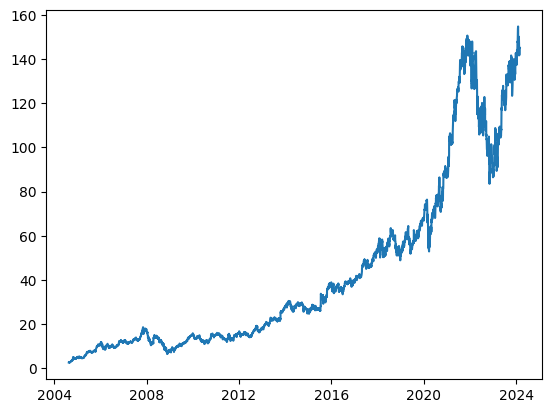

In [39]:
data['Date'] = pd.to_datetime(data['Date'])

plt.plot(data['Date'], data['Close'])

In [40]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 10
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),Close(t-10)
Date,,,,,,,,,,,
2004-09-02,2.528273,2.496891,2.549693,2.540727,2.643840,2.687676,2.640104,2.611960,2.724787,2.697639,2.499133
2004-09-03,2.490913,2.528273,2.496891,2.549693,2.540727,2.643840,2.687676,2.640104,2.611960,2.724787,2.697639
2004-09-07,2.530017,2.490913,2.528273,2.496891,2.549693,2.540727,2.643840,2.687676,2.640104,2.611960,2.724787
2004-09-08,2.547950,2.530017,2.490913,2.528273,2.496891,2.549693,2.540727,2.643840,2.687676,2.640104,2.611960
2004-09-09,2.548199,2.547950,2.530017,2.490913,2.528273,2.496891,2.549693,2.540727,2.643840,2.687676,2.640104
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-16,141.759995,143.940002,147.139999,146.369995,148.729996,150.220001,147.220001,146.679993,145.410004,144.929993,143.539993
2024-02-20,142.199997,141.759995,143.940002,147.139999,146.369995,148.729996,150.220001,147.220001,146.679993,145.410004,144.929993
2024-02-21,143.839996,142.199997,141.759995,143.940002,147.139999,146.369995,148.729996,150.220001,147.220001,146.679993,145.410004


In [41]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[  2.528273,   2.496891,   2.549693, ...,   2.724787,   2.697639,
          2.499133],
       [  2.490913,   2.528273,   2.496891, ...,   2.61196 ,   2.724787,
          2.697639],
       [  2.530017,   2.490913,   2.528273, ...,   2.640104,   2.61196 ,
          2.724787],
       ...,
       [143.839996, 142.199997, 141.759995, ..., 147.220001, 146.679993,
        145.410004],
       [145.320007, 143.839996, 142.199997, ..., 150.220001, 147.220001,
        146.679993],
       [145.289993, 145.320007, 143.839996, ..., 148.729996, 150.220001,
        147.220001]])

In [42]:
shifted_df_as_np.shape

(4902, 11)

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.99950955, -0.99992152, -0.99922835, ..., -0.99692976,
        -0.99728615, -0.99989209],
       [-1.        , -0.99950955, -0.99992152, ..., -0.99841093,
        -0.99692976, -0.99728615],
       [-0.99948665, -1.        , -0.99950955, ..., -0.99804146,
        -0.99841093, -0.99692976],
       ...,
       [ 0.8555948 ,  0.83406531,  0.82828907, ...,  0.89996664,
         0.89287756,  0.87620546],
       [ 0.87502401,  0.8555948 ,  0.83406531, ...,  0.93934988,
         0.89996664,  0.89287756],
       [ 0.87462999,  0.87502401,  0.8555948 , ...,  0.91978947,
         0.93934988,  0.89996664]])

In [45]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((4902, 10), (4902,))

In [46]:
X = dc(np.flip(X, axis=1))
X

array([[-0.99989209, -0.99728615, -0.99692976, ..., -0.99934605,
        -0.99922835, -0.99992152],
       [-0.99728615, -0.99692976, -0.99841093, ..., -0.99922835,
        -0.99992152, -0.99950955],
       [-0.99692976, -0.99841093, -0.99804146, ..., -0.99992152,
        -0.99950955, -1.        ],
       ...,
       [ 0.87620546,  0.89287756,  0.89996664, ...,  0.85690765,
         0.82828907,  0.83406531],
       [ 0.89287756,  0.89996664,  0.93934988, ...,  0.82828907,
         0.83406531,  0.8555948 ],
       [ 0.89996664,  0.93934988,  0.91978947, ...,  0.83406531,
         0.8555948 ,  0.87502401]])

In [47]:
split_index = int(len(X) * 0.95)

split_index

4656

4656

In [49]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4656, 10), (246, 10), (4656,), (246,))

In [50]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4656, 10, 1), (246, 10, 1), (4656, 1), (246, 1))

In [52]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

<ipython-input-52-dc0238fa5194>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).float()
<ipython-input-52-dc0238fa5194>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train).float()
<ipython-input-52-dc0238fa5194>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).float()
<ipython-input-52-dc0238fa5194>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_

(torch.Size([4656, 10, 1]),
 torch.Size([246, 10, 1]),
 torch.Size([4656, 1]),
 torch.Size([246, 1]))

In [54]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [55]:
train_dataset

In [56]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [57]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 10, 1]) torch.Size([16, 1])


In [58]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [61]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [62]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [63]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.785
Batch 200, Loss: 0.296

Val Loss: 0.156
***************************************************

Epoch: 2
Batch 100, Loss: 0.013
Batch 200, Loss: 0.010

Val Loss: 0.067
***************************************************

Epoch: 3
Batch 100, Loss: 0.007
Batch 200, Loss: 0.005

Val Loss: 0.031
***************************************************

Epoch: 4
Batch 100, Loss: 0.003
Batch 200, Loss: 0.002

Val Loss: 0.013
***************************************************

Epoch: 5
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001

Val Loss: 0.008
***************************************************

Epoch: 6
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001

Val Loss: 0.005
***************************************************

Epoch: 7
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001

Val Loss: 0.004
***************************************************

Epoch: 8
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001

Val Loss: 0.004
***************************************************



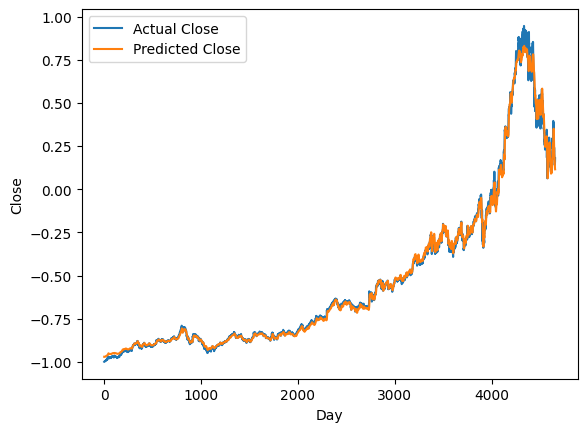

In [64]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [65]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([-0.97022885, -0.97041196, -0.97061425, ...,  0.12854785,
        0.1191079 ,  0.11531633])

In [66]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([-0.99950957, -1.        , -0.99948663, ...,  0.1527354 ,
        0.1554922 ,  0.17912209])

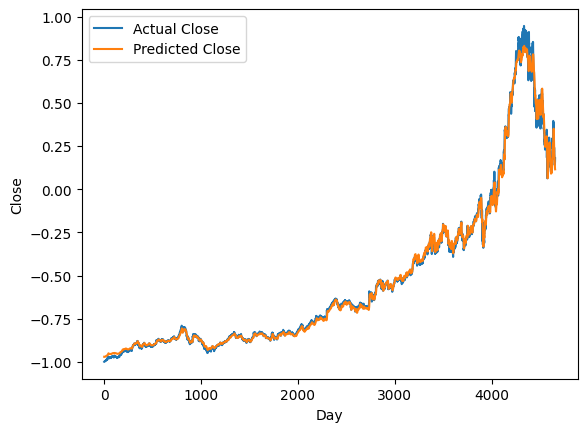

In [67]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [68]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([0.12297979, 0.13870843, 0.16017263, 0.17460087, 0.18632454,
       0.18691376, 0.17639263, 0.16522315, 0.16255292, 0.17055076,
       0.19729258, 0.23150152, 0.2622956 , 0.29685143, 0.31999785,
       0.33972004, 0.3517926 , 0.35024714, 0.33971021, 0.32850668,
       0.316957  , 0.31504092, 0.31868708, 0.32645342, 0.33381307,
       0.35262203, 0.36536402, 0.37160957, 0.37123054, 0.37696311,
       0.38577762, 0.38620597, 0.38096455, 0.37385863, 0.36910132,
       0.36652485, 0.36720085, 0.36244273, 0.35677347, 0.36376598,
       0.37284955, 0.37981573, 0.38009781, 0.37871599, 0.3739166 ,
       0.37149355, 0.37577724, 0.37980461, 0.39612067, 0.42651737,
       0.45826182, 0.48278701, 0.50862765, 0.53228307, 0.55522501,
       0.57248926, 0.59108561, 0.59969723, 0.60106748, 0.60625052,
       0.61271584, 0.61633378, 0.61595058, 0.61698657, 0.61965126,
       0.62521589, 0.63312525, 0.62959683, 0.62431169, 0.6191504 ,
       0.61783057, 0.61748797, 0.61747992, 0.62074411, 0.62031

array([0.12297979, 0.13870843, 0.16017263, 0.17460087, 0.18632454,
       0.18691376, 0.17639263, 0.16522315, 0.16255292, 0.17055076,
       0.19729258, 0.23150152, 0.2622956 , 0.29685143, 0.31999785,
       0.33972004, 0.3517926 , 0.35024714, 0.33971021, 0.32850668,
       0.316957  , 0.31504092, 0.31868708, 0.32645342, 0.33381307,
       0.35262203, 0.36536402, 0.37160957, 0.37123054, 0.37696311,
       0.38577762, 0.38620597, 0.38096455, 0.37385863, 0.36910132,
       0.36652485, 0.36720085, 0.36244273, 0.35677347, 0.36376598,
       0.37284955, 0.37981573, 0.38009781, 0.37871599, 0.3739166 ,
       0.37149355, 0.37577724, 0.37980461, 0.39612067, 0.42651737,
       0.45826182, 0.48278701, 0.50862765, 0.53228307, 0.55522501,
       0.57248926, 0.59108561, 0.59969723, 0.60106748, 0.60625052,
       0.61271584, 0.61633378, 0.61595058, 0.61698657, 0.61965126,
       0.62521589, 0.63312525, 0.62959683, 0.62431169, 0.6191504 ,
       0.61783057, 0.61748797, 0.61747992, 0.62074411, 0.62031

In [70]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([0.20157053, 0.22204988, 0.2035397 , 0.20984107, 0.18371688,
       0.16205607, 0.17058913, 0.20458995, 0.2347838 , 0.29412118,
       0.31236872, 0.30541104, 0.35674047, 0.3354736 , 0.3622542 ,
       0.35962859, 0.32024536, 0.29792824, 0.30501723, 0.2974031 ,
       0.33258545, 0.34453177, 0.34728858, 0.34505677, 0.39691144,
       0.37131229, 0.36041632, 0.34860134, 0.38759074, 0.40426296,
       0.36435458, 0.34728858, 0.34597573, 0.35752821, 0.35765952,
       0.36908057, 0.3405934 , 0.3384929 , 0.38995376, 0.38798457,
       0.38128939, 0.35857844, 0.36041632, 0.34847003, 0.36166337,
       0.38824707, 0.38430882, 0.4412832 , 0.5019334 , 0.51532364,
       0.50272101, 0.54381084, 0.56205851, 0.58883899, 0.58529454,
       0.61968929, 0.58581972, 0.56415886, 0.59973508, 0.61391306,
       0.60354215, 0.58686996, 0.5999977 , 0.61128753, 0.62966633,
       0.64646989, 0.58122498, 0.57768047, 0.58030605, 0.59973508,
       0.60078532, 0.60012889, 0.61863905, 0.59592801, 0.59317

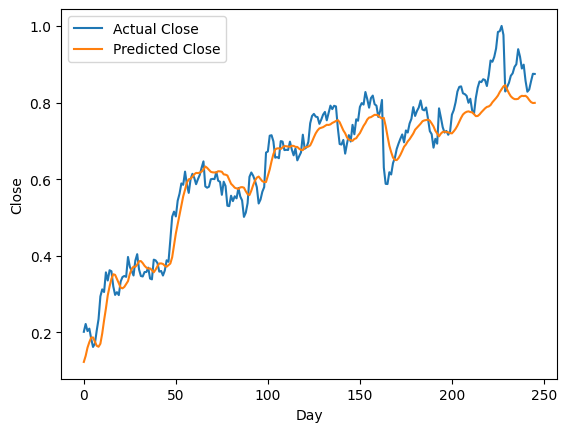

In [71]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()